In [1]:
from qiskit import *

## Build Quantum Circuit

In [2]:
# 2 Qubit Qauntum Register
qr = QuantumRegister(2)

In [3]:
# 2 Classical Register to take measurement from the 2 Quantum Bits above
cr = ClassicalRegister(2)

In [4]:
# Circuit that uses both qr and cr
circuit = QuantumCircuit(qr, cr)

## Visualize the Circuit

In [5]:
%matplotlib inline

In [6]:
# 2 Quantum Bits (q0) and 2 Classical Bits (c0) in the circuit
circuit.draw()

## Build Gates
Create entaglement

In [7]:
# Apply a Hadamard Gate on the first Qubit
circuit.h(qr[0])

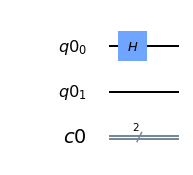

In [8]:
# Better visualization with (output = 'mpl')
circuit.draw(output = 'mpl')

## Two Qubit Operation

In [9]:
# If this Then that
circuit.cx([0], qr[1])  # (Control, Target)

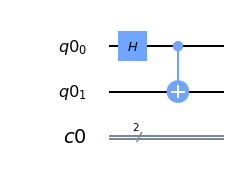

In [10]:
# Circuit is now composed of a Hadamard Gate and a Controlled Node
circuit.draw(output = 'mpl')
# This now creates Entangelement between q0_0 and q0_1

## Measure the Qubits
Store them into Classical Bits

In [11]:
# Apply measurement
circuit.measure(qr, cr)

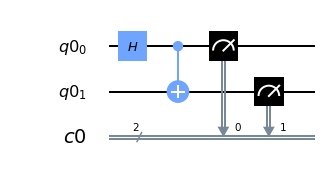

In [12]:
circuit.draw(output = 'mpl')

## Simulate the Circuit

In [13]:
# Aer is what we use when we run simulations on our local computer
simulator = Aer.get_backend('qasm_simulator')  # Quantum Assembly Language

In [14]:
# Executing the circuit using the simulator as a backend
result = execute(circuit, backend = simulator).result()

## Visualize the Result

In [15]:
from qiskit.tools.visualization import plot_histogram

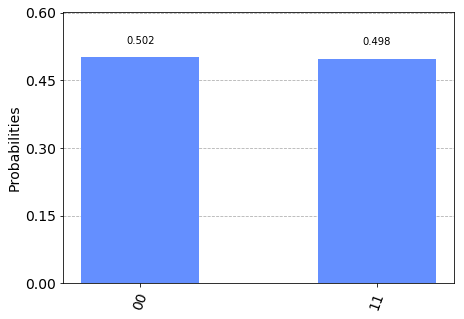

In [16]:
plot_histogram(result.get_counts(circuit))
# 51.7% probability of getting 00
# 48.3% probability of getting 11
# Small error margin due to running a limited number of shots on our simulation, instead of an infinite number of shots

## Access IBMQ

In [17]:
# Load account
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [18]:
# Choose the provider on which to run our code
provider = IBMQ.get_provider('ibm-q')

In [19]:
# The Quantum Computer with which we want to work with
qcomp = provider.get_backend('ibmq_16_melbourne')

In [20]:
job = execute(circuit, backend = qcomp)

In [21]:
# Import job_monitor to queue our job to a real public device at IBM
from qiskit.tools.monitor import job_monitor

In [22]:
job_monitor(job)  # The "Job Status" text below will update in a few minutes

Job Status: job has successfully run


In [23]:
# Once the "Job Status" says "successfully run" then:
result = job.result()

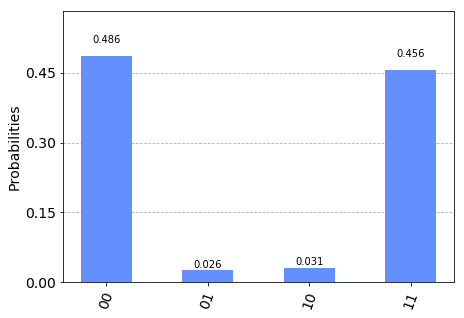

In [24]:
# Visualize the result
plot_histogram(result.get_counts(circuit))
# On a real Quantum device more probabilities can appear, such as 01 and 10 == small Quantum errors can still appear

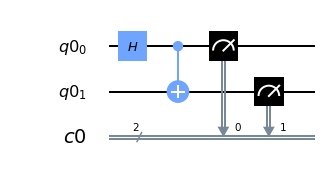

In [25]:
circuit.draw(output = 'mpl')

In [26]:
circuit.draw()